/opt/anaconda3/lib/python3.7/site-packages/skimage/transform/radon_transform.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  coords = np.array(np.ogrid[:image.shape[0], :image.shape[1]])


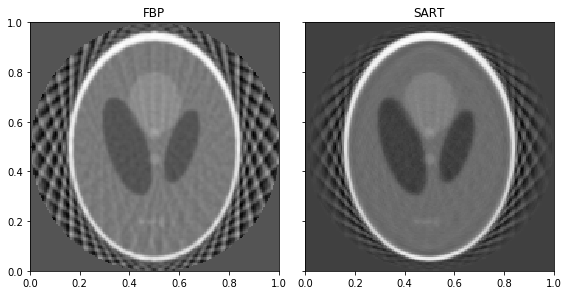

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale, iradon, iradon_sart

theta = np.linspace(0., 180., 20, endpoint=False)
sigma = .1
niter = 10

u = rescale(shepp_logan_phantom(), scale=0.4, mode='reflect', multichannel=False)

f = radon(u, theta=theta)
f_delta = f + np.random.normal(0,sigma,size=f.shape)

u_fbp = iradon(f_delta, theta=theta, filter='hann')

u_sart = np.zeros((niter,u.shape[0],u.shape[1]))
u_sart[0] = iradon_sart(f_delta,theta=theta)
for k in range(niter-1):
    u_sart[k+1] = iradon_sart(f_delta,theta=theta,image=u_sart[k])

fig, ax = plt.subplots(1, 2, figsize=(8, 4.5), sharey=True)

ax[0].imshow(u_fbp, cmap=plt.cm.Greys_r, extent=(0, 1, 0, 1))
ax[0].set_title('FBP')

ax[1].imshow(u_sart[-1], cmap=plt.cm.Greys_r, extent=(0, 1, 0, 1))
ax[1].set_title('SART')

fig.tight_layout()
plt.show()